In [1]:
import pandas as pd
from uszipcode import ZipcodeSearchEngine
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:

# Note that you'll have to paste our API key here. I haven't included it since this will go to the Github repo
client = Socrata("data.lacity.org", "LLaYxNjJnTyIyES7N63sJAUDv")


#Only getting the first 1000 rows to ease computational requirements but when we have all of our codes written
#we should grab the full dataset.
result_list = client.get("7fvc-faax", limit=2000000)

# Convert to pandas DataFrame
crime_df = pd.DataFrame.from_records(result_list)
crime_df.head()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,01,Central,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2017-11-02T00:00:00.000,2017-11-02T00:00:00.000,170101261,1800 S BROADWAY,"{'type': 'Point', 'coordinates': [-118.2647, 3...",0329 2004,203,OTHER BUSINESS,0195,IC,Invest Cont,2130,58,H,M,NaN,NaN
1,01,Central,888,888,NaN,NaN,NaN,TRESPASSING,ALAMEDA ST,2017-10-30T00:00:00.000,2017-10-30T00:00:00.000,170128267,LOS ANGELES ST,"{'type': 'Point', 'coordinates': [-118.2318, 3...",0910 2028 1501 2004,135,MTA PROPERTY OR PARKING LOT,0119,IC,Invest Cont,2230,48,H,M,NaN,NaN
2,20,Olympic,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2018-06-30T00:00:00.000,2018-06-30T00:00:00.000,182013514,800 S KENMORE AV,"{'type': 'Point', 'coordinates': [-118.2981, 3...",0329,122,"VEHICLE, PASSENGER/TRUCK",2045,IC,Invest Cont,0205,32,H,M,NaN,NaN
3,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,NaN,2017-11-01T00:00:00.000,2017-11-01T00:00:00.000,170128444,300 S SANTA FE AV,"{'type': 'Point', 'coordinates': [-118.2326, 3...",1609 1307 0358 0344,101,STREET,0139,IC,Invest Cont,1730,20,H,M,NaN,NaN
4,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,SAN PEDRO ST,2017-11-01T00:00:00.000,2017-11-01T00:00:00.000,170128445,3RD ST,"{'type': 'Point', 'coordinates': [-118.2411, 3...",0344 1609 1307 0358,101,STREET,0138,IC,Invest Cont,2200,22,H,F,NaN,NaN


In [3]:
# Converting "date_occ" row to a datetime object
crime_df["date_occ"]=pd.to_datetime(crime_df["date_occ"])

#IGNORE THIS
#Strip month and year from date
#converted_dates = []
#for date in crime_df["date_occ"]:
    #converted_time = datetime.strptime(date, "Y%-%m-%d")
    #converted_dates.append(converted_time)

#Create new columns in Crime dataframe for Month and Year
crime_df["Month"] = [date.month for date in crime_df["date_occ"]]
crime_df["Year"] = [date.year for date in crime_df["date_occ"]]
crime_df.head()

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,Month,Year
0,01,Central,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2017-11-02,2017-11-02T00:00:00.000,170101261,1800 S BROADWAY,"{'type': 'Point', 'coordinates': [-118.2647, 3...",0329 2004,203,OTHER BUSINESS,0195,IC,Invest Cont,2130,58,H,M,NaN,NaN,11,2017
1,01,Central,888,888,NaN,NaN,NaN,TRESPASSING,ALAMEDA ST,2017-10-30,2017-10-30T00:00:00.000,170128267,LOS ANGELES ST,"{'type': 'Point', 'coordinates': [-118.2318, 3...",0910 2028 1501 2004,135,MTA PROPERTY OR PARKING LOT,0119,IC,Invest Cont,2230,48,H,M,NaN,NaN,10,2017
2,20,Olympic,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,2018-06-30,2018-06-30T00:00:00.000,182013514,800 S KENMORE AV,"{'type': 'Point', 'coordinates': [-118.2981, 3...",0329,122,"VEHICLE, PASSENGER/TRUCK",2045,IC,Invest Cont,0205,32,H,M,NaN,NaN,6,2018
3,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,NaN,2017-11-01,2017-11-01T00:00:00.000,170128444,300 S SANTA FE AV,"{'type': 'Point', 'coordinates': [-118.2326, 3...",1609 1307 0358 0344,101,STREET,0139,IC,Invest Cont,1730,20,H,M,NaN,NaN,11,2017
4,01,Central,330,330,NaN,NaN,NaN,BURGLARY FROM VEHICLE,SAN PEDRO ST,2017-11-01,2017-11-01T00:00:00.000,170128445,3RD ST,"{'type': 'Point', 'coordinates': [-118.2411, 3...",0344 1609 1307 0358,101,STREET,0138,IC,Invest Cont,2200,22,H,F,NaN,NaN,11,2017


In [4]:
# Code to look at crime descriptions and their associated crime code
#All the numbers in this data set are stored as objects rather than intergers.
#We may want to convert all numeric columns to numbers but here I'm just converting the crime codes to numbers
crime_df["crm_cd"] = pd.to_numeric(crime_df["crm_cd"])

#Groups by crime description then look at average crime code. This matches 
crime_code = crime_df.groupby("crm_cd_desc")
crime_code = crime_code.mean()
crime_code = crime_code.drop(["Month","Year"], axis=1)
crime_code

,crm_cd
crm_cd_desc,
ABORTION/ILLEGAL,952.0
ARSON,648.0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,231.0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0
ATTEMPTED ROBBERY,220.0
BATTERY - SIMPLE ASSAULT,624.0
BATTERY ON A FIREFIGHTER,622.0
BATTERY POLICE (SIMPLE),623.0
BATTERY WITH SEXUAL CONTACT,860.0


In [5]:
lat = []
lon = []
split_lat_longs = []

# For each row in a varible,
for x in range(len(crime_df["location"])):
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        location = crime_df["location_1"][x]["coordinates"]
        split_lat_longs.append(location)
        lon.append(location[0])
        lat.append(location[1])
        # Split the row by comma and append
        # everything after the comma to lon
        #lon.append(location.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

crime_df["Latitude"] = lat
crime_df["Longitude"] = lon

In [6]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
zipcodes = []
counter = 0
counter_2 = 0
for index, row in crime_df.iterrows():

    #Get zipcodes based on lat-longs
    try:
        crime_lat = row["Latitude"]
        crime_lon = row["Longitude"]
        zipcode = search.by_coordinate(crime_lat, crime_lon, returns=1)
        zipcodes.append(zipcode[0]["Zipcode"])
        counter_2 = counter_2+1
    except:
        zipcodes.append("NaN")
        counter = counter + 1
        print(f"{counter} exceptions identified on index {counter_2}")
        counter_2 = counter_2+1

crime_df["Zip Code"] = zipcodes

1 exceptions identified on index 1745
2 exceptions identified on index 1776
3 exceptions identified on index 1787
4 exceptions identified on index 1802
5 exceptions identified on index 1810
6 exceptions identified on index 1888
7 exceptions identified on index 1898
8 exceptions identified on index 1909
9 exceptions identified on index 1914
10 exceptions identified on index 1985
11 exceptions identified on index 2014
12 exceptions identified on index 2056
13 exceptions identified on index 2178
14 exceptions identified on index 2184
15 exceptions identified on index 2238
16 exceptions identified on index 2317
17 exceptions identified on index 2318
18 exceptions identified on index 2431
19 exceptions identified on index 2452
20 exceptions identified on index 2488
21 exceptions identified on index 2489
22 exceptions identified on index 2491
23 exceptions identified on index 2502
24 exceptions identified on index 2541
25 exceptions identified on index 2552
26 exceptions identified on index 

206 exceptions identified on index 48162
207 exceptions identified on index 48183
208 exceptions identified on index 48345
209 exceptions identified on index 48416
210 exceptions identified on index 48417
211 exceptions identified on index 48440
212 exceptions identified on index 48606
213 exceptions identified on index 48608
214 exceptions identified on index 48615
215 exceptions identified on index 48666
216 exceptions identified on index 48671
217 exceptions identified on index 48695
218 exceptions identified on index 48704
219 exceptions identified on index 48745
220 exceptions identified on index 48782
221 exceptions identified on index 48806
222 exceptions identified on index 48837
223 exceptions identified on index 48840
224 exceptions identified on index 48917
225 exceptions identified on index 48920
226 exceptions identified on index 48955
227 exceptions identified on index 48989
228 exceptions identified on index 49030
229 exceptions identified on index 49046
230 exceptions i

406 exceptions identified on index 74547
407 exceptions identified on index 74548
408 exceptions identified on index 74590
409 exceptions identified on index 74950
410 exceptions identified on index 75004
411 exceptions identified on index 75005
412 exceptions identified on index 75208
413 exceptions identified on index 75209
414 exceptions identified on index 75210
415 exceptions identified on index 75361
416 exceptions identified on index 75536
417 exceptions identified on index 75537
418 exceptions identified on index 75538
419 exceptions identified on index 75539
420 exceptions identified on index 75576
421 exceptions identified on index 75577
422 exceptions identified on index 75578
423 exceptions identified on index 75599
424 exceptions identified on index 75616
425 exceptions identified on index 75617
426 exceptions identified on index 75618
427 exceptions identified on index 75619
428 exceptions identified on index 75620
429 exceptions identified on index 75621
430 exceptions i

605 exceptions identified on index 104261
606 exceptions identified on index 104281
607 exceptions identified on index 104321
608 exceptions identified on index 104345
609 exceptions identified on index 104369
610 exceptions identified on index 104545
611 exceptions identified on index 104551
612 exceptions identified on index 104566
613 exceptions identified on index 104625
614 exceptions identified on index 104705
615 exceptions identified on index 104889
616 exceptions identified on index 104924
617 exceptions identified on index 104956
618 exceptions identified on index 104986
619 exceptions identified on index 104999
620 exceptions identified on index 105002
621 exceptions identified on index 105004
622 exceptions identified on index 105051
623 exceptions identified on index 105079
624 exceptions identified on index 105112
625 exceptions identified on index 105152
626 exceptions identified on index 105225
627 exceptions identified on index 105233
628 exceptions identified on index

805 exceptions identified on index 112688
806 exceptions identified on index 112702
807 exceptions identified on index 112746
808 exceptions identified on index 112780
809 exceptions identified on index 112902
810 exceptions identified on index 112906
811 exceptions identified on index 112919
812 exceptions identified on index 112942
813 exceptions identified on index 112970
814 exceptions identified on index 112980
815 exceptions identified on index 113032
816 exceptions identified on index 113094
817 exceptions identified on index 113113
818 exceptions identified on index 113125
819 exceptions identified on index 113133
820 exceptions identified on index 113217
821 exceptions identified on index 113324
822 exceptions identified on index 113364
823 exceptions identified on index 113388
824 exceptions identified on index 113405
825 exceptions identified on index 113486
826 exceptions identified on index 113520
827 exceptions identified on index 113524
828 exceptions identified on index

1001 exceptions identified on index 123530
1002 exceptions identified on index 123768
1003 exceptions identified on index 123774
1004 exceptions identified on index 123776
1005 exceptions identified on index 123806
1006 exceptions identified on index 123905
1007 exceptions identified on index 123908
1008 exceptions identified on index 124261
1009 exceptions identified on index 124753
1010 exceptions identified on index 124793
1011 exceptions identified on index 125209
1012 exceptions identified on index 125235
1013 exceptions identified on index 125326
1014 exceptions identified on index 125394
1015 exceptions identified on index 125423
1016 exceptions identified on index 125597
1017 exceptions identified on index 125609
1018 exceptions identified on index 125704
1019 exceptions identified on index 125789
1020 exceptions identified on index 125844
1021 exceptions identified on index 126045
1022 exceptions identified on index 126072
1023 exceptions identified on index 126091
1024 except

1192 exceptions identified on index 139578
1193 exceptions identified on index 139612
1194 exceptions identified on index 139665
1195 exceptions identified on index 139707
1196 exceptions identified on index 139772
1197 exceptions identified on index 139785
1198 exceptions identified on index 139930
1199 exceptions identified on index 140000
1200 exceptions identified on index 140040
1201 exceptions identified on index 140073
1202 exceptions identified on index 140105
1203 exceptions identified on index 140127
1204 exceptions identified on index 140220
1205 exceptions identified on index 140272
1206 exceptions identified on index 140303
1207 exceptions identified on index 140325
1208 exceptions identified on index 140396
1209 exceptions identified on index 140401
1210 exceptions identified on index 142078
1211 exceptions identified on index 142108
1212 exceptions identified on index 142368
1213 exceptions identified on index 142386
1214 exceptions identified on index 142406
1215 except

1385 exceptions identified on index 151874
1386 exceptions identified on index 152019
1387 exceptions identified on index 152022
1388 exceptions identified on index 152091
1389 exceptions identified on index 152129
1390 exceptions identified on index 152142
1391 exceptions identified on index 152155
1392 exceptions identified on index 152156
1393 exceptions identified on index 152290
1394 exceptions identified on index 152304
1395 exceptions identified on index 152327
1396 exceptions identified on index 152385
1397 exceptions identified on index 152439
1398 exceptions identified on index 152558
1399 exceptions identified on index 152560
1400 exceptions identified on index 152630
1401 exceptions identified on index 152688
1402 exceptions identified on index 152791
1403 exceptions identified on index 152797
1404 exceptions identified on index 152841
1405 exceptions identified on index 152896
1406 exceptions identified on index 152924
1407 exceptions identified on index 152925
1408 except

1577 exceptions identified on index 200964
1578 exceptions identified on index 200968
1579 exceptions identified on index 201006
1580 exceptions identified on index 201016
1581 exceptions identified on index 201022
1582 exceptions identified on index 201032
1583 exceptions identified on index 201084
1584 exceptions identified on index 201088
1585 exceptions identified on index 201109
1586 exceptions identified on index 201132
1587 exceptions identified on index 201136
1588 exceptions identified on index 201137
1589 exceptions identified on index 201142
1590 exceptions identified on index 201144
1591 exceptions identified on index 201179
1592 exceptions identified on index 201218
1593 exceptions identified on index 201246
1594 exceptions identified on index 201247
1595 exceptions identified on index 201257
1596 exceptions identified on index 201271
1597 exceptions identified on index 201276
1598 exceptions identified on index 201280
1599 exceptions identified on index 201285
1600 except

1771 exceptions identified on index 647778
1772 exceptions identified on index 647801
1773 exceptions identified on index 647807
1774 exceptions identified on index 648002
1775 exceptions identified on index 648067
1776 exceptions identified on index 648104
1777 exceptions identified on index 648131
1778 exceptions identified on index 648148
1779 exceptions identified on index 648224
1780 exceptions identified on index 648244
1781 exceptions identified on index 648306
1782 exceptions identified on index 648314
1783 exceptions identified on index 648405
1784 exceptions identified on index 654871
1785 exceptions identified on index 654971
1786 exceptions identified on index 654986
1787 exceptions identified on index 655014
1788 exceptions identified on index 655075
1789 exceptions identified on index 655119
1790 exceptions identified on index 655195
1791 exceptions identified on index 655317
1792 exceptions identified on index 655373
1793 exceptions identified on index 655409
1794 except

1965 exceptions identified on index 704048
1966 exceptions identified on index 704052
1967 exceptions identified on index 704081
1968 exceptions identified on index 704087
1969 exceptions identified on index 704094
1970 exceptions identified on index 704101
1971 exceptions identified on index 704127
1972 exceptions identified on index 704166
1973 exceptions identified on index 714269
1974 exceptions identified on index 714282
1975 exceptions identified on index 714372
1976 exceptions identified on index 714443
1977 exceptions identified on index 714479
1978 exceptions identified on index 714483
1979 exceptions identified on index 714488
1980 exceptions identified on index 714511
1981 exceptions identified on index 714677
1982 exceptions identified on index 714732
1983 exceptions identified on index 714743
1984 exceptions identified on index 714850
1985 exceptions identified on index 714860
1986 exceptions identified on index 715003
1987 exceptions identified on index 715080
1988 except

2156 exceptions identified on index 762888
2157 exceptions identified on index 762892
2158 exceptions identified on index 762914
2159 exceptions identified on index 762974
2160 exceptions identified on index 763064
2161 exceptions identified on index 763114
2162 exceptions identified on index 763149
2163 exceptions identified on index 766856
2164 exceptions identified on index 770565
2165 exceptions identified on index 772293
2166 exceptions identified on index 772295
2167 exceptions identified on index 772326
2168 exceptions identified on index 772403
2169 exceptions identified on index 772437
2170 exceptions identified on index 772535
2171 exceptions identified on index 772601
2172 exceptions identified on index 772645
2173 exceptions identified on index 772702
2174 exceptions identified on index 772705
2175 exceptions identified on index 772788
2176 exceptions identified on index 772829
2177 exceptions identified on index 772871
2178 exceptions identified on index 772872
2179 except

2345 exceptions identified on index 1108992
2346 exceptions identified on index 1109013
2347 exceptions identified on index 1109026
2348 exceptions identified on index 1109071
2349 exceptions identified on index 1109788
2350 exceptions identified on index 1112564
2351 exceptions identified on index 1112652
2352 exceptions identified on index 1114128
2353 exceptions identified on index 1114982
2354 exceptions identified on index 1117089
2355 exceptions identified on index 1119303
2356 exceptions identified on index 1119365
2357 exceptions identified on index 1121175
2358 exceptions identified on index 1121979
2359 exceptions identified on index 1122247
2360 exceptions identified on index 1123868
2361 exceptions identified on index 1129883
2362 exceptions identified on index 1133032
2363 exceptions identified on index 1134620
2364 exceptions identified on index 1137121
2365 exceptions identified on index 1137484
2366 exceptions identified on index 1138960
2367 exceptions identified on in

2533 exceptions identified on index 1616828
2534 exceptions identified on index 1616831
2535 exceptions identified on index 1616840
2536 exceptions identified on index 1616857
2537 exceptions identified on index 1616894
2538 exceptions identified on index 1616897
2539 exceptions identified on index 1616910
2540 exceptions identified on index 1616948
2541 exceptions identified on index 1616985
2542 exceptions identified on index 1617018
2543 exceptions identified on index 1617029
2544 exceptions identified on index 1617040
2545 exceptions identified on index 1617057
2546 exceptions identified on index 1617098
2547 exceptions identified on index 1617108
2548 exceptions identified on index 1617162
2549 exceptions identified on index 1617176
2550 exceptions identified on index 1617240
2551 exceptions identified on index 1617243
2552 exceptions identified on index 1617263
2553 exceptions identified on index 1617300
2554 exceptions identified on index 1617315
2555 exceptions identified on in

2720 exceptions identified on index 1625117
2721 exceptions identified on index 1625135
2722 exceptions identified on index 1625169
2723 exceptions identified on index 1625187
2724 exceptions identified on index 1625233
2725 exceptions identified on index 1625303
2726 exceptions identified on index 1625310
2727 exceptions identified on index 1625314
2728 exceptions identified on index 1625340
2729 exceptions identified on index 1625341
2730 exceptions identified on index 1625425
2731 exceptions identified on index 1625491
2732 exceptions identified on index 1625494
2733 exceptions identified on index 1625608
2734 exceptions identified on index 1625624
2735 exceptions identified on index 1625628
2736 exceptions identified on index 1625630
2737 exceptions identified on index 1625659
2738 exceptions identified on index 1625691
2739 exceptions identified on index 1625774
2740 exceptions identified on index 1625779
2741 exceptions identified on index 1625791
2742 exceptions identified on in

2907 exceptions identified on index 1635436
2908 exceptions identified on index 1635468
2909 exceptions identified on index 1635470
2910 exceptions identified on index 1635489
2911 exceptions identified on index 1635490
2912 exceptions identified on index 1635534
2913 exceptions identified on index 1635583
2914 exceptions identified on index 1635603
2915 exceptions identified on index 1635609
2916 exceptions identified on index 1635631
2917 exceptions identified on index 1635651
2918 exceptions identified on index 1635665
2919 exceptions identified on index 1635730
2920 exceptions identified on index 1635740
2921 exceptions identified on index 1635750
2922 exceptions identified on index 1635759
2923 exceptions identified on index 1635792
2924 exceptions identified on index 1635807
2925 exceptions identified on index 1635827
2926 exceptions identified on index 1635862
2927 exceptions identified on index 1635865
2928 exceptions identified on index 1635898
2929 exceptions identified on in

3096 exceptions identified on index 1642373
3097 exceptions identified on index 1643728
3098 exceptions identified on index 1643745
3099 exceptions identified on index 1643762
3100 exceptions identified on index 1643766
3101 exceptions identified on index 1643772
3102 exceptions identified on index 1643786
3103 exceptions identified on index 1643797
3104 exceptions identified on index 1643809
3105 exceptions identified on index 1643872
3106 exceptions identified on index 1643892
3107 exceptions identified on index 1643914
3108 exceptions identified on index 1643924
3109 exceptions identified on index 1643933
3110 exceptions identified on index 1643947
3111 exceptions identified on index 1643958
3112 exceptions identified on index 1643959
3113 exceptions identified on index 1643973
3114 exceptions identified on index 1643992
3115 exceptions identified on index 1644050
3116 exceptions identified on index 1644089
3117 exceptions identified on index 1644152
3118 exceptions identified on in

3284 exceptions identified on index 1646948
3285 exceptions identified on index 1646949
3286 exceptions identified on index 1647018
3287 exceptions identified on index 1647021
3288 exceptions identified on index 1647026
3289 exceptions identified on index 1647040
3290 exceptions identified on index 1647050
3291 exceptions identified on index 1647058
3292 exceptions identified on index 1647117
3293 exceptions identified on index 1647139
3294 exceptions identified on index 1647149
3295 exceptions identified on index 1647169
3296 exceptions identified on index 1647174
3297 exceptions identified on index 1647220
3298 exceptions identified on index 1647224
3299 exceptions identified on index 1647230
3300 exceptions identified on index 1647265
3301 exceptions identified on index 1647268
3302 exceptions identified on index 1647289
3303 exceptions identified on index 1647325
3304 exceptions identified on index 1647334
3305 exceptions identified on index 1647349
3306 exceptions identified on in

3472 exceptions identified on index 1655606
3473 exceptions identified on index 1655688
3474 exceptions identified on index 1655729
3475 exceptions identified on index 1655740
3476 exceptions identified on index 1656069
3477 exceptions identified on index 1656210
3478 exceptions identified on index 1656337
3479 exceptions identified on index 1656350
3480 exceptions identified on index 1656548
3481 exceptions identified on index 1656582
3482 exceptions identified on index 1656815
3483 exceptions identified on index 1656848
3484 exceptions identified on index 1656952
3485 exceptions identified on index 1657202
3486 exceptions identified on index 1657227
3487 exceptions identified on index 1657257
3488 exceptions identified on index 1657285
3489 exceptions identified on index 1657425
3490 exceptions identified on index 1657671
3491 exceptions identified on index 1657716
3492 exceptions identified on index 1657727
3493 exceptions identified on index 1657824
3494 exceptions identified on in

3659 exceptions identified on index 1662658
3660 exceptions identified on index 1662699
3661 exceptions identified on index 1662751
3662 exceptions identified on index 1662763
3663 exceptions identified on index 1662775
3664 exceptions identified on index 1662804
3665 exceptions identified on index 1662848
3666 exceptions identified on index 1662887
3667 exceptions identified on index 1662904
3668 exceptions identified on index 1662927
3669 exceptions identified on index 1662956
3670 exceptions identified on index 1662974
3671 exceptions identified on index 1662992
3672 exceptions identified on index 1663008
3673 exceptions identified on index 1663012
3674 exceptions identified on index 1663015
3675 exceptions identified on index 1663033
3676 exceptions identified on index 1663034
3677 exceptions identified on index 1663068
3678 exceptions identified on index 1663133
3679 exceptions identified on index 1663159
3680 exceptions identified on index 1663190
3681 exceptions identified on in

3847 exceptions identified on index 1672221
3848 exceptions identified on index 1672733
3849 exceptions identified on index 1672863
3850 exceptions identified on index 1672957
3851 exceptions identified on index 1673161
3852 exceptions identified on index 1673175
3853 exceptions identified on index 1673464
3854 exceptions identified on index 1673467
3855 exceptions identified on index 1673475
3856 exceptions identified on index 1673523
3857 exceptions identified on index 1673536
3858 exceptions identified on index 1673549
3859 exceptions identified on index 1673561
3860 exceptions identified on index 1673984
3861 exceptions identified on index 1674128
3862 exceptions identified on index 1674247
3863 exceptions identified on index 1674250
3864 exceptions identified on index 1674354
3865 exceptions identified on index 1674366
3866 exceptions identified on index 1674398
3867 exceptions identified on index 1674424
3868 exceptions identified on index 1675881
3869 exceptions identified on in

4036 exceptions identified on index 1678230
4037 exceptions identified on index 1678234
4038 exceptions identified on index 1678241
4039 exceptions identified on index 1678251
4040 exceptions identified on index 1678271
4041 exceptions identified on index 1678297
4042 exceptions identified on index 1678303
4043 exceptions identified on index 1678336
4044 exceptions identified on index 1678353
4045 exceptions identified on index 1678358
4046 exceptions identified on index 1678364
4047 exceptions identified on index 1678365
4048 exceptions identified on index 1678375
4049 exceptions identified on index 1678387
4050 exceptions identified on index 1678392
4051 exceptions identified on index 1678395
4052 exceptions identified on index 1678399
4053 exceptions identified on index 1678424
4054 exceptions identified on index 1678439
4055 exceptions identified on index 1678444
4056 exceptions identified on index 1678457
4057 exceptions identified on index 1678470
4058 exceptions identified on in

4226 exceptions identified on index 1685948
4227 exceptions identified on index 1685965
4228 exceptions identified on index 1686018
4229 exceptions identified on index 1686022
4230 exceptions identified on index 1686041
4231 exceptions identified on index 1686054
4232 exceptions identified on index 1686058
4233 exceptions identified on index 1686090
4234 exceptions identified on index 1686108
4235 exceptions identified on index 1686112
4236 exceptions identified on index 1686135
4237 exceptions identified on index 1686148
4238 exceptions identified on index 1686177
4239 exceptions identified on index 1686228
4240 exceptions identified on index 1686240
4241 exceptions identified on index 1686248
4242 exceptions identified on index 1686253
4243 exceptions identified on index 1686261
4244 exceptions identified on index 1686267
4245 exceptions identified on index 1686269
4246 exceptions identified on index 1686274
4247 exceptions identified on index 1686324
4248 exceptions identified on in

4413 exceptions identified on index 1694142
4414 exceptions identified on index 1694202
4415 exceptions identified on index 1694206
4416 exceptions identified on index 1694214
4417 exceptions identified on index 1694217
4418 exceptions identified on index 1694222
4419 exceptions identified on index 1694260
4420 exceptions identified on index 1694264
4421 exceptions identified on index 1694336
4422 exceptions identified on index 1694378
4423 exceptions identified on index 1694417
4424 exceptions identified on index 1694418
4425 exceptions identified on index 1694435
4426 exceptions identified on index 1694440
4427 exceptions identified on index 1694482
4428 exceptions identified on index 1694531
4429 exceptions identified on index 1694572
4430 exceptions identified on index 1694594
4431 exceptions identified on index 1694657
4432 exceptions identified on index 1694658
4433 exceptions identified on index 1694662
4434 exceptions identified on index 1694690
4435 exceptions identified on in

4601 exceptions identified on index 1707022
4602 exceptions identified on index 1707123
4603 exceptions identified on index 1707362
4604 exceptions identified on index 1707401
4605 exceptions identified on index 1707422
4606 exceptions identified on index 1707442
4607 exceptions identified on index 1710055
4608 exceptions identified on index 1710080
4609 exceptions identified on index 1710222
4610 exceptions identified on index 1710304
4611 exceptions identified on index 1710482
4612 exceptions identified on index 1710813
4613 exceptions identified on index 1710946
4614 exceptions identified on index 1710972
4615 exceptions identified on index 1710997
4616 exceptions identified on index 1711128
4617 exceptions identified on index 1711142
4618 exceptions identified on index 1711192
4619 exceptions identified on index 1711215
4620 exceptions identified on index 1711251
4621 exceptions identified on index 1711274
4622 exceptions identified on index 1711297
4623 exceptions identified on in

4788 exceptions identified on index 1722724
4789 exceptions identified on index 1722760
4790 exceptions identified on index 1722809
4791 exceptions identified on index 1722822
4792 exceptions identified on index 1722859
4793 exceptions identified on index 1722912
4794 exceptions identified on index 1722926
4795 exceptions identified on index 1722949
4796 exceptions identified on index 1722950
4797 exceptions identified on index 1722954
4798 exceptions identified on index 1722964
4799 exceptions identified on index 1722983
4800 exceptions identified on index 1723002
4801 exceptions identified on index 1723031
4802 exceptions identified on index 1723036
4803 exceptions identified on index 1723056
4804 exceptions identified on index 1723061
4805 exceptions identified on index 1723064
4806 exceptions identified on index 1723076
4807 exceptions identified on index 1723087
4808 exceptions identified on index 1723114
4809 exceptions identified on index 1723138
4810 exceptions identified on in

4975 exceptions identified on index 1726903
4976 exceptions identified on index 1726919
4977 exceptions identified on index 1726923
4978 exceptions identified on index 1726935
4979 exceptions identified on index 1726954
4980 exceptions identified on index 1726987
4981 exceptions identified on index 1727000
4982 exceptions identified on index 1727088
4983 exceptions identified on index 1727192
4984 exceptions identified on index 1727223
4985 exceptions identified on index 1727259
4986 exceptions identified on index 1727274
4987 exceptions identified on index 1727311
4988 exceptions identified on index 1727337
4989 exceptions identified on index 1727407
4990 exceptions identified on index 1727454
4991 exceptions identified on index 1727505
4992 exceptions identified on index 1727507
4993 exceptions identified on index 1727512
4994 exceptions identified on index 1727630
4995 exceptions identified on index 1727645
4996 exceptions identified on index 1727659
4997 exceptions identified on in

5163 exceptions identified on index 1733068
5164 exceptions identified on index 1733071
5165 exceptions identified on index 1733097
5166 exceptions identified on index 1733106
5167 exceptions identified on index 1733115
5168 exceptions identified on index 1733123
5169 exceptions identified on index 1733124
5170 exceptions identified on index 1733153
5171 exceptions identified on index 1733207
5172 exceptions identified on index 1733213
5173 exceptions identified on index 1733217
5174 exceptions identified on index 1733219
5175 exceptions identified on index 1733220
5176 exceptions identified on index 1733257
5177 exceptions identified on index 1733266
5178 exceptions identified on index 1733270
5179 exceptions identified on index 1733274
5180 exceptions identified on index 1733280
5181 exceptions identified on index 1733281
5182 exceptions identified on index 1733287
5183 exceptions identified on index 1733290
5184 exceptions identified on index 1733295
5185 exceptions identified on in

5352 exceptions identified on index 1735484
5353 exceptions identified on index 1735526
5354 exceptions identified on index 1735534
5355 exceptions identified on index 1735540
5356 exceptions identified on index 1735558
5357 exceptions identified on index 1735586
5358 exceptions identified on index 1735593
5359 exceptions identified on index 1735646
5360 exceptions identified on index 1735710
5361 exceptions identified on index 1735744
5362 exceptions identified on index 1735745
5363 exceptions identified on index 1735773
5364 exceptions identified on index 1735814
5365 exceptions identified on index 1735834
5366 exceptions identified on index 1735841
5367 exceptions identified on index 1735917
5368 exceptions identified on index 1735986
5369 exceptions identified on index 1735992
5370 exceptions identified on index 1735993
5371 exceptions identified on index 1735997
5372 exceptions identified on index 1736005
5373 exceptions identified on index 1736034
5374 exceptions identified on in

5540 exceptions identified on index 1743629
5541 exceptions identified on index 1743631
5542 exceptions identified on index 1743638
5543 exceptions identified on index 1743647
5544 exceptions identified on index 1743662
5545 exceptions identified on index 1743715
5546 exceptions identified on index 1743720
5547 exceptions identified on index 1743721
5548 exceptions identified on index 1743724
5549 exceptions identified on index 1743752
5550 exceptions identified on index 1743775
5551 exceptions identified on index 1743783
5552 exceptions identified on index 1743801
5553 exceptions identified on index 1743808
5554 exceptions identified on index 1743830
5555 exceptions identified on index 1743843
5556 exceptions identified on index 1743864
5557 exceptions identified on index 1743892
5558 exceptions identified on index 1743901
5559 exceptions identified on index 1743924
5560 exceptions identified on index 1743953
5561 exceptions identified on index 1743984
5562 exceptions identified on in

5727 exceptions identified on index 1749545
5728 exceptions identified on index 1749660
5729 exceptions identified on index 1749681
5730 exceptions identified on index 1749892
5731 exceptions identified on index 1749896
5732 exceptions identified on index 1749982
5733 exceptions identified on index 1750172
5734 exceptions identified on index 1750179
5735 exceptions identified on index 1750198
5736 exceptions identified on index 1750308
5737 exceptions identified on index 1750313
5738 exceptions identified on index 1750320
5739 exceptions identified on index 1750357
5740 exceptions identified on index 1750493
5741 exceptions identified on index 1750503
5742 exceptions identified on index 1750643
5743 exceptions identified on index 1750722
5744 exceptions identified on index 1750853
5745 exceptions identified on index 1750983
5746 exceptions identified on index 1751101
5747 exceptions identified on index 1751174
5748 exceptions identified on index 1751592
5749 exceptions identified on in

5915 exceptions identified on index 1758439
5916 exceptions identified on index 1758451
5917 exceptions identified on index 1758478
5918 exceptions identified on index 1758489
5919 exceptions identified on index 1758520
5920 exceptions identified on index 1758532
5921 exceptions identified on index 1758570
5922 exceptions identified on index 1758601
5923 exceptions identified on index 1758602
5924 exceptions identified on index 1758655
5925 exceptions identified on index 1758702
5926 exceptions identified on index 1758721
5927 exceptions identified on index 1758747
5928 exceptions identified on index 1758754
5929 exceptions identified on index 1758766
5930 exceptions identified on index 1758777
5931 exceptions identified on index 1758786
5932 exceptions identified on index 1758813
5933 exceptions identified on index 1758838
5934 exceptions identified on index 1758843
5935 exceptions identified on index 1758854
5936 exceptions identified on index 1758876
5937 exceptions identified on in

6105 exceptions identified on index 1760831
6106 exceptions identified on index 1760868
6107 exceptions identified on index 1760876
6108 exceptions identified on index 1760890
6109 exceptions identified on index 1760909
6110 exceptions identified on index 1760925
6111 exceptions identified on index 1760944
6112 exceptions identified on index 1760955
6113 exceptions identified on index 1760956
6114 exceptions identified on index 1761018
6115 exceptions identified on index 1761019
6116 exceptions identified on index 1761049
6117 exceptions identified on index 1761065
6118 exceptions identified on index 1761067
6119 exceptions identified on index 1761076
6120 exceptions identified on index 1761083
6121 exceptions identified on index 1761089
6122 exceptions identified on index 1761125
6123 exceptions identified on index 1761129
6124 exceptions identified on index 1761152
6125 exceptions identified on index 1761155
6126 exceptions identified on index 1761168
6127 exceptions identified on in

6294 exceptions identified on index 1767921
6295 exceptions identified on index 1767930
6296 exceptions identified on index 1767931
6297 exceptions identified on index 1768030
6298 exceptions identified on index 1768044
6299 exceptions identified on index 1768045
6300 exceptions identified on index 1768051
6301 exceptions identified on index 1768056
6302 exceptions identified on index 1768058
6303 exceptions identified on index 1768069
6304 exceptions identified on index 1768078
6305 exceptions identified on index 1768083
6306 exceptions identified on index 1768085
6307 exceptions identified on index 1768130
6308 exceptions identified on index 1768151
6309 exceptions identified on index 1768170
6310 exceptions identified on index 1768179
6311 exceptions identified on index 1768206
6312 exceptions identified on index 1768211
6313 exceptions identified on index 1768232
6314 exceptions identified on index 1768235
6315 exceptions identified on index 1768244
6316 exceptions identified on in

6481 exceptions identified on index 1776503
6482 exceptions identified on index 1776520
6483 exceptions identified on index 1776544
6484 exceptions identified on index 1776584
6485 exceptions identified on index 1776644
6486 exceptions identified on index 1776699
6487 exceptions identified on index 1776714
6488 exceptions identified on index 1776818
6489 exceptions identified on index 1776828
6490 exceptions identified on index 1776846
6491 exceptions identified on index 1776872
6492 exceptions identified on index 1776909
6493 exceptions identified on index 1776930
6494 exceptions identified on index 1776985
6495 exceptions identified on index 1776994
6496 exceptions identified on index 1776997
6497 exceptions identified on index 1777068
6498 exceptions identified on index 1777114
6499 exceptions identified on index 1777134
6500 exceptions identified on index 1777282
6501 exceptions identified on index 1777283
6502 exceptions identified on index 1777297
6503 exceptions identified on in

6668 exceptions identified on index 1779662
6669 exceptions identified on index 1779711
6670 exceptions identified on index 1779734
6671 exceptions identified on index 1779782
6672 exceptions identified on index 1779785
6673 exceptions identified on index 1779789
6674 exceptions identified on index 1779795
6675 exceptions identified on index 1779855
6676 exceptions identified on index 1779864
6677 exceptions identified on index 1779866
6678 exceptions identified on index 1779887
6679 exceptions identified on index 1779918
6680 exceptions identified on index 1779942
6681 exceptions identified on index 1779965
6682 exceptions identified on index 1779973
6683 exceptions identified on index 1779982
6684 exceptions identified on index 1780022
6685 exceptions identified on index 1780023
6686 exceptions identified on index 1780150
6687 exceptions identified on index 1780164
6688 exceptions identified on index 1780275
6689 exceptions identified on index 1780355
6690 exceptions identified on in

6857 exceptions identified on index 1788876
6858 exceptions identified on index 1788891
6859 exceptions identified on index 1788936
6860 exceptions identified on index 1788949
6861 exceptions identified on index 1788984
6862 exceptions identified on index 1788997
6863 exceptions identified on index 1789003
6864 exceptions identified on index 1789098
6865 exceptions identified on index 1789154
6866 exceptions identified on index 1789169
6867 exceptions identified on index 1789199
6868 exceptions identified on index 1789242
6869 exceptions identified on index 1789252
6870 exceptions identified on index 1789254
6871 exceptions identified on index 1789274
6872 exceptions identified on index 1789277
6873 exceptions identified on index 1789324
6874 exceptions identified on index 1789376
6875 exceptions identified on index 1789394
6876 exceptions identified on index 1789403
6877 exceptions identified on index 1789429
6878 exceptions identified on index 1789431
6879 exceptions identified on in

7045 exceptions identified on index 1796978
7046 exceptions identified on index 1796991
7047 exceptions identified on index 1796993
7048 exceptions identified on index 1797011
7049 exceptions identified on index 1797014
7050 exceptions identified on index 1797055
7051 exceptions identified on index 1797060
7052 exceptions identified on index 1797066
7053 exceptions identified on index 1797074
7054 exceptions identified on index 1797093
7055 exceptions identified on index 1797105
7056 exceptions identified on index 1797138
7057 exceptions identified on index 1797148
7058 exceptions identified on index 1797201
7059 exceptions identified on index 1797221
7060 exceptions identified on index 1797228
7061 exceptions identified on index 1797231
7062 exceptions identified on index 1797245
7063 exceptions identified on index 1797247
7064 exceptions identified on index 1797287
7065 exceptions identified on index 1797292
7066 exceptions identified on index 1797297
7067 exceptions identified on in

In [7]:
crime_df["Latitude"]

0          34.0328
1          34.0577
2          34.0561
3          34.0460
4          34.0467
5          34.0437
6          34.2011
7          34.0617
8          34.0449
9          34.0494
10         34.0502
11         34.0691
12         34.3149
13         34.0480
14         34.0480
15         34.0435
16         34.0483
17         34.0347
18         34.0408
19         34.0487
20         34.0421
21         34.0408
22         34.0449
23         34.0569
24         34.0478
25         34.0495
26         34.0317
27         34.0495
28         34.0454
29         34.0448
30         34.0483
31         34.0572
32         34.0519
33         34.0449
34         34.0461
35         34.0433
36         34.0502
37         34.0502
38         34.0599
39         34.0430
40         34.0490
41         34.0446
42         34.0438
43         34.0563
44         34.0458
45         34.0659
46         34.0663
47         34.1545
48         34.1971
49         34.0495
50         34.0511
51         34.0423
52         3

In [8]:
crime_df["crm_cd_desc"].value_counts()

BATTERY - SIMPLE ASSAULT                                           164099
BURGLARY FROM VEHICLE                                              138571
VEHICLE - STOLEN                                                   138081
BURGLARY                                                           128685
THEFT PLAIN - PETTY ($950 & UNDER)                                 127720
THEFT OF IDENTITY                                                  112071
INTIMATE PARTNER - SIMPLE ASSAULT                                   97443
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114        87819
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                            79603
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                      77610
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                     74005
ROBBERY                                                             72031
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036        61191
CRIMINAL THREATS - NO WEAPON DISPLAYED

In [9]:
violent_crimes = crime_df.loc[crime_df["crm_cd_desc"]=="CRIMINAL HOMICIDE"]

violent_crime_list = ["RAPE, ATTEMPTED","ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER", "LYNCHING", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","BATTERY - SIMPLE ASSAULT",
"BATTERY ON A FIREFIGHTER", "BATTERY POLICE (SIMPLE)","BATTERY WITH SEXUAL CONTACT","LYNCHING - ATTEMPTED","RAPE, FORCIBLE",]

for vc in violent_crime_list:
    v_temp = crime_df.loc[crime_df["crm_cd_desc"]==vc]
    violent_crimes = pd.concat([violent_crimes, v_temp])
    print(f"{vc} added to list")

RAPE, ATTEMPTED added to list
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER added to list
LYNCHING added to list
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT added to list
BATTERY - SIMPLE ASSAULT added to list
BATTERY ON A FIREFIGHTER added to list
BATTERY POLICE (SIMPLE) added to list
BATTERY WITH SEXUAL CONTACT added to list
LYNCHING - ATTEMPTED added to list
RAPE, FORCIBLE added to list


In [10]:
violent_crimes

,area_id,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,date_rptd,dr_no,location,location_1,mocodes,premis_cd,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,Month,Year,Latitude,Longitude,Zip Code
1261,16,Foothill,110,110,998,NaN,NaN,CRIMINAL HOMICIDE,NaN,2011-07-13,2011-07-13T00:00:00.000,111613334,11600 BROMONT AV,"{'type': 'Point', 'coordinates': [-118.4048, 3...",0407 0430 0906 1100 1414 1409 1407 1402,501,SINGLE FAMILY DWELLING,1602,AA,Adult Arrest,1612,25,B,F,UNKNOWN FIREARM,106,7,2011,34.2809,-118.4048,91340
1317,05,Harbor,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2015-09-03,2015-09-03T00:00:00.000,150501088,25900 S WESTERN AV,"{'type': 'Point', 'coordinates': [-118.3076, 3...",0430 1100 0202,101,STREET,0531,AA,Adult Arrest,1910,42,H,M,HAND GUN,102,9,2015,33.7882,-118.3076,90710
1349,09,Van Nuys,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2015-10-10,2015-10-11T00:00:00.000,150918012,6000 KESTER AV,"{'type': 'Point', 'coordinates': [-118.4574, 3...",0906 1100 0430,101,STREET,0941,AA,Adult Arrest,2250,19,H,M,UNKNOWN FIREARM,106,10,2015,34.1794,-118.4574,91411
1403,03,Southwest,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,COLISEUM ST,2016-12-03,2016-12-03T00:00:00.000,160326463,NICOLET AV,"{'type': 'Point', 'coordinates': [-118.3403, 3...",3037 3104 2000,101,STREET,0363,AA,Adult Arrest,0200,50,B,F,VEHICLE,307,12,2016,34.0126,-118.3403,90008
1555,12,77th Street,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,VERNON AV,2016-04-05,2016-04-05T00:00:00.000,161210900,HARBOR FY,"{'type': 'Point', 'coordinates': [-118.2813, 3...",1822 0408,110,FREEWAY,1209,IC,Invest Cont,1300,19,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,4,2016,34.0038,-118.2813,90037
1766,01,Central,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,GLADYS AV,2017-02-12,2017-02-12T00:00:00.000,170106659,CENTRAL,"{'type': 'Point', 'coordinates': [-118.2397, 3...",1100 0430 1218 0906 2004,102,SIDEWALK,0148,AA,Adult Arrest,0317,42,H,M,HAND GUN,102,2,2017,34.0429,-118.2397,90013
1771,01,Central,110,110,998,NaN,NaN,CRIMINAL HOMICIDE,SAN PEDRO ST,2017-04-03,2017-04-03T00:00:00.000,170110825,7TH,"{'type': 'Point', 'coordinates': [-118.2468, 3...",1402 0411 0429 1310 2004,116,OTHER/OUTSIDE,0166,AA,Adult Arrest,2130,53,H,M,UNKNOWN WEAPON/OTHER WEAPON,500,4,2017,34.0407,-118.2468,90013
1794,01,Central,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2017-05-26,2017-05-26T00:00:00.000,170115263,500 GLADYS AV,"{'type': 'Point', 'coordinates': [-118.2405, 3...",0302 1100 0400 0906 0430,102,SIDEWALK,0158,AA,Adult Arrest,1128,35,B,M,HAND GUN,102,5,2017,34.0421,-118.2405,90013
1814,01,Central,110,110,NaN,NaN,NaN,CRIMINAL HOMICIDE,NaN,2017-06-23,2017-06-23T00:00:00.000,170117818,500 S SAN PEDRO ST,"{'type': 'Point', 'coordinates': [-118.2439, 3...",1100 0430 0906 2004,102,SIDEWALK,0157,AA,Adult Arrest,0553,62,B,M,SEMI-AUTOMATIC PISTOL,109,6,2017,34.0442,-118.2439,90013
1820,01,Central,110,110,998,NaN,NaN,CRIMINAL HOMICIDE,WALL ST,2017-06-25,2017-06-25T00:00:00.000,170118021,4TH ST,"{'type': 'Point', 'coordinates': [-118.2447, 3...",1402 0430 0906 2004 1218 0930 1100,103,ALLEY,0138,AA,Adult Arrest,0650,43,B,M,UNKNOWN FIREARM,106,6,2017,34.0464,-118.2447,90013


In [11]:
months = violent_crimes.groupby("Month").count()

In [12]:
months_axis  = ["Jan","Feb","Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

In [13]:
monthly_crime = months["area_name"]

<BarContainer object of 12 artists>

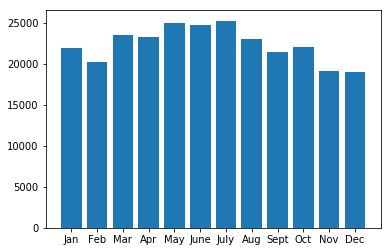

In [14]:
plt.bar(months_axis, monthly_crime)


In [15]:
years = violent_crimes.groupby("Year").count()

In [16]:
years_axis = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

In [17]:
yearly_crime = years["area_name"]

<BarContainer object of 9 artists>

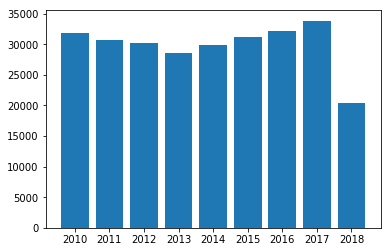

In [18]:
plt.bar(years_axis, yearly_crime)

In [19]:
crime_2010 = violent_crimes.loc[violent_crimes["Year"]==2010]
crime_2010 = crime_2010.groupby("Zip Code").count().reset_index()
crime_2010 = crime_2010[["Zip Code", "crm_cd_1"]]
crime_2010 = crime_2010.rename(columns={"crm_cd_1": "2010 Crime count"})

crime_2011 = violent_crimes.loc[violent_crimes["Year"]==2011]
crime_2011 = crime_2011.groupby("Zip Code").count().reset_index()
crime_2011 = crime_2011[["Zip Code", "crm_cd_1"]]
crime_2011 = crime_2011.rename(columns={"crm_cd_1": "2011 Crime count"})


crime_2012 = violent_crimes.loc[violent_crimes["Year"]==2012]
crime_2012 = crime_2012.groupby("Zip Code").count().reset_index()
crime_2012 = crime_2012[["Zip Code", "crm_cd_1"]]
crime_2012 = crime_2012.rename(columns={"crm_cd_1": "2012 Crime count"})


crime_2013 = violent_crimes.loc[violent_crimes["Year"]==2013]
crime_2013 = crime_2013.groupby("Zip Code").count().reset_index()
crime_2013 = crime_2013[["Zip Code", "crm_cd_1"]]
crime_2013 = crime_2013.rename(columns={"crm_cd_1": "2013 Crime count"})


crime_2014 = violent_crimes.loc[violent_crimes["Year"]==2014]
crime_2014 = crime_2014.groupby("Zip Code").count().reset_index()
crime_2014 = crime_2014[["Zip Code", "crm_cd_1"]]
crime_2014 = crime_2014.rename(columns={"crm_cd_1": "2014 Crime count"})


crime_2015 = violent_crimes.loc[violent_crimes["Year"]==2015]
crime_2015 = crime_2015.groupby("Zip Code").count().reset_index()
crime_2015 = crime_2015[["Zip Code", "crm_cd_1"]]
crime_2015 = crime_2015.rename(columns={"crm_cd_1": "2015 Crime count"})


crime_2016 = violent_crimes.loc[violent_crimes["Year"]==2016]
crime_2016 = crime_2016.groupby("Zip Code").count().reset_index()
crime_2016 = crime_2016[["Zip Code", "crm_cd_1"]]
crime_2016 = crime_2016.rename(columns={"crm_cd_1": "2016 Crime count"})


crime_2017 = violent_crimes.loc[violent_crimes["Year"]==2017]
crime_2017 = crime_2017.groupby("Zip Code").count().reset_index()
crime_2017 = crime_2017[["Zip Code", "crm_cd_1"]]
crime_2017 = crime_2017.rename(columns={"crm_cd_1": "2017 Crime count"})


crime_2018 = violent_crimes.loc[violent_crimes["Year"]==2018]
crime_2018 = crime_2018.groupby("Zip Code").count().reset_index()
crime_2018 = crime_2018[["Zip Code", "crm_cd_1"]]
crime_2018 = crime_2018.rename(columns={"crm_cd_1": "2018 Crime count"})


In [20]:
crime_by_year = crime_2010.merge(crime_2011, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2012, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2013, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2014, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2015, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2016, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2017, on="Zip Code", how = "outer")
crime_by_year = crime_by_year.merge(crime_2018, on="Zip Code", how = "outer")


In [21]:
len(crime_2015)

138

In [22]:
crime_by_year

,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count
0,90001,79.0,86.0,53.0,60.0,48.0,52.0,38.0,51.0,34.0
1,90002,558.0,612.0,540.0,467.0,520.0,465.0,520.0,524.0,330.0
2,90003,1515.0,1453.0,1457.0,1409.0,1395.0,1293.0,1400.0,1456.0,904.0
3,90004,288.0,218.0,265.0,319.0,248.0,252.0,259.0,267.0,165.0
4,90005,263.0,253.0,257.0,253.0,271.0,236.0,227.0,260.0,138.0
5,90006,482.0,467.0,489.0,467.0,566.0,470.0,450.0,469.0,264.0
6,90007,455.0,403.0,480.0,416.0,457.0,427.0,468.0,435.0,278.0
7,90008,367.0,387.0,407.0,400.0,397.0,323.0,356.0,356.0,194.0
8,90010,210.0,211.0,199.0,198.0,261.0,235.0,243.0,262.0,154.0
9,90011,947.0,791.0,744.0,676.0,658.0,710.0,836.0,744.0,506.0


In [23]:
populations = []
for index, row in crime_by_year.iterrows():

    #Get zipcodes based on lat-longs
    try:
        violent_zip = row["Zip Code"]
        population_zip = search.by_zipcode(violent_zip)
        populations.append(population_zip["Population"])
    except:
        populations.append("NaN")
        print(f"exception encountered")


crime_by_year["Population"] = populations

In [24]:
crime_by_year.reset_index()

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count,Population
0,0,90001,79.0,86.0,53.0,60.0,48.0,52.0,38.0,51.0,34.0,57110.0
1,1,90002,558.0,612.0,540.0,467.0,520.0,465.0,520.0,524.0,330.0,51223.0
2,2,90003,1515.0,1453.0,1457.0,1409.0,1395.0,1293.0,1400.0,1456.0,904.0,66266.0
3,3,90004,288.0,218.0,265.0,319.0,248.0,252.0,259.0,267.0,165.0,62180.0
4,4,90005,263.0,253.0,257.0,253.0,271.0,236.0,227.0,260.0,138.0,37681.0
5,5,90006,482.0,467.0,489.0,467.0,566.0,470.0,450.0,469.0,264.0,59185.0
6,6,90007,455.0,403.0,480.0,416.0,457.0,427.0,468.0,435.0,278.0,40920.0
7,7,90008,367.0,387.0,407.0,400.0,397.0,323.0,356.0,356.0,194.0,32327.0
8,8,90010,210.0,211.0,199.0,198.0,261.0,235.0,243.0,262.0,154.0,3800.0
9,9,90011,947.0,791.0,744.0,676.0,658.0,710.0,836.0,744.0,506.0,103892.0


In [25]:
crime_by_year["2010 Crime Rate"]= crime_by_year["2010 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2011 Crime Rate"]= crime_by_year["2011 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2012 Crime Rate"]= crime_by_year["2012 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2013 Crime Rate"]= crime_by_year["2013 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2014 Crime Rate"]= crime_by_year["2014 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2015 Crime Rate"]= crime_by_year["2015 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2016 Crime Rate"]= crime_by_year["2016 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2017 Crime Rate"]= crime_by_year["2017 Crime count"]/crime_by_year["Population"]*100000
crime_by_year["2018 Crime Rate"]= crime_by_year["2018 Crime count"]/crime_by_year["Population"]*100000


In [26]:
crime_by_year = crime_by_year.dropna()
crime_by_year = crime_by_year.reset_index()

In [27]:
crime_by_year

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,2018 Crime Rate
0,0,90001,79.0,86.0,53.0,60.0,48.0,52.0,38.0,51.0,34.0,57110.0,1.383295e+02,1.505866e+02,9.280336e+01,1.050604e+02,8.404833e+01,9.105236e+01,6.653826e+01,8.930135e+01,5.953423e+01
1,1,90002,558.0,612.0,540.0,467.0,520.0,465.0,520.0,524.0,330.0,51223.0,1.089354e+03,1.194776e+03,1.054214e+03,9.116998e+02,1.015169e+03,9.077953e+02,1.015169e+03,1.022978e+03,6.442418e+02
2,2,90003,1515.0,1453.0,1457.0,1409.0,1395.0,1293.0,1400.0,1456.0,904.0,66266.0,2.286240e+03,2.192678e+03,2.198714e+03,2.126279e+03,2.105152e+03,1.951227e+03,2.112697e+03,2.197205e+03,1.364199e+03
3,3,90004,288.0,218.0,265.0,319.0,248.0,252.0,259.0,267.0,165.0,62180.0,4.631714e+02,3.505950e+02,4.261821e+02,5.130267e+02,3.988421e+02,4.052750e+02,4.165326e+02,4.293985e+02,2.653586e+02
4,4,90005,263.0,253.0,257.0,253.0,271.0,236.0,227.0,260.0,138.0,37681.0,6.979645e+02,6.714259e+02,6.820413e+02,6.714259e+02,7.191954e+02,6.263103e+02,6.024256e+02,6.900029e+02,3.662323e+02
5,5,90006,482.0,467.0,489.0,467.0,566.0,470.0,450.0,469.0,264.0,59185.0,8.143955e+02,7.890513e+02,8.262229e+02,7.890513e+02,9.563234e+02,7.941201e+02,7.603278e+02,7.924305e+02,4.460590e+02
6,6,90007,455.0,403.0,480.0,416.0,457.0,427.0,468.0,435.0,278.0,40920.0,1.111926e+03,9.848485e+02,1.173021e+03,1.016618e+03,1.116813e+03,1.043500e+03,1.143695e+03,1.063050e+03,6.793744e+02
7,7,90008,367.0,387.0,407.0,400.0,397.0,323.0,356.0,356.0,194.0,32327.0,1.135274e+03,1.197142e+03,1.259009e+03,1.237356e+03,1.228076e+03,9.991648e+02,1.101247e+03,1.101247e+03,6.001175e+02
8,8,90010,210.0,211.0,199.0,198.0,261.0,235.0,243.0,262.0,154.0,3800.0,5.526316e+03,5.552632e+03,5.236842e+03,5.210526e+03,6.868421e+03,6.184211e+03,6.394737e+03,6.894737e+03,4.052632e+03
9,9,90011,947.0,791.0,744.0,676.0,658.0,710.0,836.0,744.0,506.0,103892.0,9.115235e+02,7.613676e+02,7.161283e+02,6.506757e+02,6.333500e+02,6.834020e+02,8.046818e+02,7.161283e+02,4.870442e+02


In [28]:
from scipy.stats import linregress
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

crime_change = []
for index, row in crime_by_year.iterrows():

    #Get zipcodes based on lat-longs
    try:
        crime_10 = row["2010 Crime Rate"]
        crime_11 = row["2011 Crime Rate"]
        crime_12 = row["2012 Crime Rate"]
        crime_13 = row["2013 Crime Rate"]
        crime_14 = row["2014 Crime Rate"]
        crime_15 = row["2015 Crime Rate"]
        crime_16 = row["2016 Crime Rate"]
        crime_17 = row["2017 Crime Rate"]
        yearly_rate = [crime_10, crime_11, crime_12, crime_13, crime_14, crime_15, crime_16, crime_17]
        (slope, _, _, _, _) = linregress(years, yearly_rate)
        append.crime_change(slope)

    except:
        print("crime change could not be calculated")


crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
crime change could not be calculated
c

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [29]:
from scipy.stats import linregress
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

crime_change = []
for x in range(len(crime_by_year)):

    #Get zipcodes based on lat-longs
    try:
        crime_10 = crime_by_year["2010 Crime Rate"][x]
        crime_11 = crime_by_year["2011 Crime Rate"][x]
        crime_12 = crime_by_year["2012 Crime Rate"][x]
        crime_13 = crime_by_year["2013 Crime Rate"][x]
        crime_14 = crime_by_year["2014 Crime Rate"][x]
        crime_15 = crime_by_year["2015 Crime Rate"][x]
        crime_16 = crime_by_year["2016 Crime Rate"][x]
        crime_17 = crime_by_year["2017 Crime Rate"][x]
        yearly_rate = [crime_10, crime_11, crime_12, crime_13, crime_14, crime_15, crime_16, crime_17]
        (slope, _, _, _, _) = linregress(years, yearly_rate)
        crime_change.append(slope)

    except:
        print("crime change could not be calculated")

crime_by_year["Slope of Regression"] = crime_change


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [30]:
crime_by_year

,index,Zip Code,2010 Crime count,2011 Crime count,2012 Crime count,2013 Crime count,2014 Crime count,2015 Crime count,2016 Crime count,2017 Crime count,2018 Crime count,Population,2010 Crime Rate,2011 Crime Rate,2012 Crime Rate,2013 Crime Rate,2014 Crime Rate,2015 Crime Rate,2016 Crime Rate,2017 Crime Rate,2018 Crime Rate,Slope of Regression
0,0,90001,79.0,86.0,53.0,60.0,48.0,52.0,38.0,51.0,34.0,57110.0,1.383295e+02,1.505866e+02,9.280336e+01,1.050604e+02,8.404833e+01,9.105236e+01,6.653826e+01,8.930135e+01,5.953423e+01,-9.401239
1,1,90002,558.0,612.0,540.0,467.0,520.0,465.0,520.0,524.0,330.0,51223.0,1.089354e+03,1.194776e+03,1.054214e+03,9.116998e+02,1.015169e+03,9.077953e+02,1.015169e+03,1.022978e+03,6.442418e+02,-20.219712
2,2,90003,1515.0,1453.0,1457.0,1409.0,1395.0,1293.0,1400.0,1456.0,904.0,66266.0,2.286240e+03,2.192678e+03,2.198714e+03,2.126279e+03,2.105152e+03,1.951227e+03,2.112697e+03,2.197205e+03,1.364199e+03,-21.270694
3,3,90004,288.0,218.0,265.0,319.0,248.0,252.0,259.0,267.0,165.0,62180.0,4.631714e+02,3.505950e+02,4.261821e+02,5.130267e+02,3.988421e+02,4.052750e+02,4.165326e+02,4.293985e+02,2.653586e+02,-0.995574
4,4,90005,263.0,253.0,257.0,253.0,271.0,236.0,227.0,260.0,138.0,37681.0,6.979645e+02,6.714259e+02,6.820413e+02,6.714259e+02,7.191954e+02,6.263103e+02,6.024256e+02,6.900029e+02,3.662323e+02,-6.192334
5,5,90006,482.0,467.0,489.0,467.0,566.0,470.0,450.0,469.0,264.0,59185.0,8.143955e+02,7.890513e+02,8.262229e+02,7.890513e+02,9.563234e+02,7.941201e+02,7.603278e+02,7.924305e+02,4.460590e+02,-2.695342
6,6,90007,455.0,403.0,480.0,416.0,457.0,427.0,468.0,435.0,278.0,40920.0,1.111926e+03,9.848485e+02,1.173021e+03,1.016618e+03,1.116813e+03,1.043500e+03,1.143695e+03,1.063050e+03,6.793744e+02,1.949216
7,7,90008,367.0,387.0,407.0,400.0,397.0,323.0,356.0,356.0,194.0,32327.0,1.135274e+03,1.197142e+03,1.259009e+03,1.237356e+03,1.228076e+03,9.991648e+02,1.101247e+03,1.101247e+03,6.001175e+02,-17.934293
8,8,90010,210.0,211.0,199.0,198.0,261.0,235.0,243.0,262.0,154.0,3800.0,5.526316e+03,5.552632e+03,5.236842e+03,5.210526e+03,6.868421e+03,6.184211e+03,6.394737e+03,6.894737e+03,4.052632e+03,217.731830
9,9,90011,947.0,791.0,744.0,676.0,658.0,710.0,836.0,744.0,506.0,103892.0,9.115235e+02,7.613676e+02,7.161283e+02,6.506757e+02,6.333500e+02,6.834020e+02,8.046818e+02,7.161283e+02,4.870442e+02,-15.079762
